In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt

In [58]:
N = 100
K = 10.0
B = -15.2
x = np.linspace(0,10,N) + np.random.normal(scale=3.0,size=N)
y = K*x + B + np.random.normal(scale=1.5,size=N)


In [64]:
w = tf.Variable(tf.random_uniform(shape=[1],minval=-1,maxval=1),name='w')
b = tf.Variable(0.0,name='b')

learn_rate = 0.01
init_op = tf.global_variables_initializer()
y_hat = w * x + b
loss = tf.reduce_mean(tf.square(y_hat - y),name='lost')
optimizer = tf.train.GradientDescentOptimizer(learn_rate)
train = optimizer.minimize(loss)



0 [6.599261] 0.58095545
100 [9.177561] -8.360989
200 [9.651761] -12.260836
300 [9.854524] -13.928359
400 [9.941221] -14.641371
500 [9.978292] -14.946241
600 [9.9941435] -15.076604
700 [10.000921] -15.132346
800 [10.003819] -15.156178
900 [10.005058] -15.166368
[10.005585] -15.170697


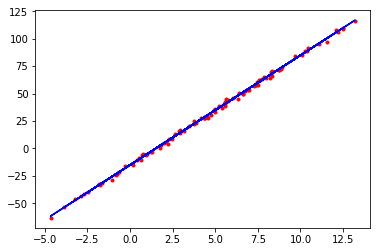

In [63]:
with tf.Session() as sess:
    sess.run(init_op)
    for i in range(1000):
        sess.run(train)
        if i%100 == 0:
            print(i,sess.run(w),sess.run(b))
    result_w ,result_b = sess.run([w,b])
print(result_w,result_b)
plt.plot(x,y,'r.')
plt.plot(x,result_w*x+result_b,'b')